# Lista 1

## Uczenie maszynowe i sztuczna inteligencja

* [regresja](https://pl.wikipedia.org/wiki/Regresja_(statystyka))
* [podobieństwo konsinusowe](https://en.wikipedia.org/wiki/Cosine_similarity)

## Zadanie 1 (10pt)

Napisz wykorzystując regresję liniową program, który na podstawie oceny filmów przez użytkowników będzie
starał się przewidzieć ocenę innych użytkowników. Jako dane wykorzystamy zbiór
[MovieLens Latest Datasets](https://grouplens.org/datasets/movielens/latest/).
Dokładnie wybierzemy mniejszy zbiór, pobierz plik
[ml-latest-small.zip](http://files.grouplens.org/datasets/movielens/ml-latest-small.zip").
Zadanie polega na wybraniu z pliku <em>ratings.csv</em> tych użytkowników ($\text{userId}$), którzy ocenili film
'Toy Story (1995)', który w tym pliku ma identyfikator '1' (patrz <em>movies.csv</em>).
W tym pliku osób takich jest $215$. Wtedy zgodnie z zapisem z wykładu
$x_{ij}$ będzie oceną $i$-tego użytkownika dla $i=0,\ldots, 214$, bo
taki jest nasz zbiór osób, które oceniły 'Toy Story' oraz $j$ będzie oceną $j$-tego filmu
dla $j=0,\ldots,m$. Jako $j$ można wybrać $\text{movieId}$ filmu, czyli
np. film o $\text{movieId}=42$ oceniony przez użytkownika $5$ (nie jest to $\text{userId}$, tylko
piąta osoba ze zbioru $215$ osób), który ocenił film jako np. $3.5$ wpisujemy $x[5, 42] = 3.5$.
Natomiast $y_i$ to ocena 'Toy Story' przez $i$-tego użytkownika. Zatem tworzymy macierz $X = [x_{ij}]$ oraz wektor $y_i$
gdzie $i=0,\ldots,215$ oraz $j=0,\ldots,m$. Dla tak przygotowanych danych wykonujemy:

* regresje liniową na całym zbiorze użytkowników dla $m=10,1000,10000$,
  czyli np. dla $m=10$ ignorujemy filmy o $\text{movieId} \gt 10$ i robimy regresje
  dla tak okrojonego zbioru ocen. Jakie dostajemy błędy. Pokaż na wykresie.
* podziel zbiór osób na tzw. zbiór treningowy oraz zbiór testowy np.
  weźmy $i=0,\ldots,200$ to będzie zbiór treningowy i na takim zbiorze osób wykonajmy regresje
  natomiast później sprawdzamy już dla całości ($215$). Zatem ostatnie
  $15$ ocen będziemy chcieli przewidzieć (zbiór testowy). Zrób przewidywanie dla
  $m=10,100,200,500,1000,10000$. Wyświetl wynik predykcji i wynik prawidłowy
  dla tych $15$ osób.

Przykład danych do regresji jakie otrzymujemy dla $m=10$ i $n=215$.

```
X = [[0.  4.  0.  0.  4.  0.  0.  0.  0.  0. ]
     [0.  0.  0.  0.  0.  0.  0.  0.  0.  0. ]
     [0.  0.  0.  0.  0.  0.  0.  0.  0.  0. ]
     [0.  0.  0.  0.  0.  0.  0.  0.  0.  0. ]
     [0.  0.  0.  0.  0.  0.  0.  0.  0.  0. ]
     [3.  0.  0.  0.  4.  0.  0.  0.  0.  0. ]
     [3.  3.  0.  0.  0.  2.  0.  0.  2.  0. ]
     [3.5 0.  0.  0.  0.  0.  0.  0.  5.  0. ]
     ...
y = [[4. ]
     [4. ]
     [4.5]
     [2.5]
     [4.5]
     [3.5]
     [4. ]
     [3.5]
     ...
```

In [15]:
import pandas as pd

# Wczytanie plików
movies_path = 'ml-latest-small/movies.csv'
ratings_path = 'ml-latest-small/ratings.csv'

movies_df = pd.read_csv(movies_path)
ratings_df = pd.read_csv(ratings_path)

# Szukanie ID filmu "Toy Story (1995)"
toy_story_id = movies_df[movies_df['title'] == 'Toy Story (1995)']['movieId'].iloc[0]

# Wybór użytkowników, którzy ocenili "Toy Story"
users_who_rated_toy_story = ratings_df[ratings_df['movieId'] == toy_story_id]['userId'].unique()
filtered_ratings = ratings_df[ratings_df['userId'].isin(users_who_rated_toy_story)]

# Tworzenie słownika, który będzie przechowywał oceny każdego użytkownika
user_ratings = {user: {} for user in users_who_rated_toy_story}
for _, row in filtered_ratings.iterrows():
    user_ratings[row['userId']][row['movieId']] = row['rating']

# Inicjalizacja macierzy X i wektora y
X = []
y = []

for user in users_who_rated_toy_story:
    # usuwamy kolumnę odpowiadająca za ocenę "Toy Story" bo to jest nasz wektor y
    user_ratings_list = [user_ratings[user].get(movie_id, 0) for movie_id in range(2, 10001)] # m = 10000
    user_ratings_list.insert(0, 1) # dodajemy 1 na początku listy, żeby móc wykonać operacje macierzowe
    X.append(user_ratings_list)
    y.append(user_ratings[user][toy_story_id])


# Sprawdzenie wymiarów macierzy X i wektora y
len(X), len(X[0]), len(y)

(215, 10000, 215)

In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

# Funkcja do przeprowadzenia regresji liniowej i obliczenia błędu MSE
def linear_regression_and_mse(X, y, max_movie_id):
    # Ograniczenie macierzy X do pierwszych max_movie_id kolumn
    X_reduced = np.array(X)[:, :max_movie_id]

    # Utworzenie i trenowanie modelu regresji liniowej
    model = LinearRegression()
    model.fit(X_reduced, y)

    # Predykcja i obliczenie błędu MSE
    y_pred = model.predict(X_reduced)
    mse = mean_squared_error(y, y_pred)
    return mse

# Obliczanie błędów MSE dla różnych wartości m
mse_values = {}
for m in [10, 1000, 10000]:
    mse = linear_regression_and_mse(X, y, m)
    mse_values[m] = mse

mse_values



{10: 0.6595994322461797,
 1000: 1.3785114998706594e-29,
 10000: 1.1665280635955712e-29}

In [17]:
# Podział na zbiór treningowy i testowy
train_indices = range(201)  # Użytkownicy od 0 do 200
test_indices = range(201, 215)  # Użytkownicy od 201 do 214

X_train = [X[i] for i in train_indices]
y_train = [y[i] for i in train_indices]
X_test = [X[i] for i in test_indices]
y_test = [y[i] for i in test_indices]

# Funkcja do przeprowadzenia regresji liniowej i obliczenia predykcji na zbiorze testowym
def linear_regression_and_prediction(X_train, y_train, X_test, max_movie_id):
    # Ograniczenie macierzy X do pierwszych max_movie_id kolumn
    X_train_reduced = np.array(X_train)[:, :max_movie_id]
    X_test_reduced = np.array(X_test)[:, :max_movie_id]

    # Utworzenie i trenowanie modelu regresji liniowej
    model = LinearRegression()
    model.fit(X_train_reduced, y_train)

    # Predykcja na zbiorze testowym
    y_pred_test = model.predict(X_test_reduced)
    return y_pred_test

# Predykcje dla różnych wartości m
predictions = {}
for m in [10, 100, 200, 500, 1000, 10000]:
    y_pred_test = linear_regression_and_prediction(X_train, y_train, X_test, m)
    predictions[m] = y_pred_test

# Wyniki predykcji dla zbioru testowego
for m, y_pred_test in predictions.items():
    mse = mean_squared_error(y_test, y_pred_test)
    print(f'm = {m}, MSE = {mse:.2f}')
    for i in range(len(y_test)):
        print(f'Predicted: {y_pred_test[i]:.2f}, True: {y_test[i]}')
        



m = 10, MSE = 1.07
Predicted: 4.07, True: 4.0
Predicted: 3.87, True: 4.0
Predicted: 3.89, True: 4.0
Predicted: 4.02, True: 3.0
Predicted: 4.87, True: 2.5
Predicted: 3.87, True: 4.0
Predicted: 3.71, True: 4.0
Predicted: 4.03, True: 3.0
Predicted: 3.82, True: 4.0
Predicted: 3.85, True: 2.5
Predicted: 3.87, True: 4.0
Predicted: 4.02, True: 2.5
Predicted: 4.07, True: 3.0
Predicted: 3.67, True: 5.0
m = 100, MSE = 6.79
Predicted: 4.66, True: 4.0
Predicted: 5.01, True: 4.0
Predicted: 3.66, True: 4.0
Predicted: 2.28, True: 3.0
Predicted: 4.48, True: 2.5
Predicted: 3.79, True: 4.0
Predicted: 0.76, True: 4.0
Predicted: 10.33, True: 3.0
Predicted: 2.09, True: 4.0
Predicted: 5.95, True: 2.5
Predicted: 4.47, True: 4.0
Predicted: 4.91, True: 2.5
Predicted: 4.00, True: 3.0
Predicted: 3.55, True: 5.0
m = 200, MSE = 271125173118280189888954368.00
Predicted: 2.77, True: 4.0
Predicted: 4.49, True: 4.0
Predicted: 4.89, True: 4.0
Predicted: 6024295209424.71, True: 3.0
Predicted: 1179028865883.34, True: 2.5

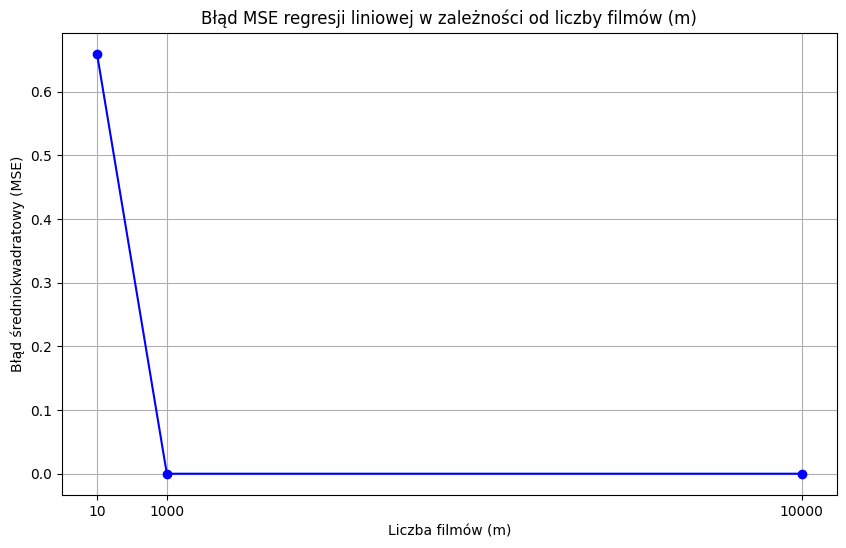

In [18]:
import matplotlib.pyplot as plt

# Przygotowanie danych do wykresu
m_values = list(mse_values.keys())
mse_scores = list(mse_values.values())

# Tworzenie wykresu
plt.figure(figsize=(10, 6))
plt.plot(m_values, mse_scores, marker='o', linestyle='-', color='b')
plt.title('Błąd MSE regresji liniowej w zależności od liczby filmów (m)')
plt.xlabel('Liczba filmów (m)')
plt.ylabel('Błąd średniokwadratowy (MSE)')
plt.xticks(m_values)
plt.grid(True)
plt.show()


## Zadanie 2 (15pt)

Napisz system rekomendacji filmów. Systemy takie są wykorzystywane przez różne firmy np.
Netflix organizował konkurs na opracowanie algorytmu, który będzie przewidywał
ocenę użytkownika [Netflix Prize](https://en.wikipedia.org/wiki/Netflix_Prize).
W zadaniu tym zaimplementujemy podobny system, który jednak zamiast przewidywania będzie na
podstawie preferencji użytkownika rekomendował filmy, które najprawdopodobniej mu się spodobają.
Istnieje wiele sposobów, aby taki system napisać, dla zainteresowanych bardziej tematem proponuje
zobaczyć np. [Recommendation Systems](http://infolab.stanford.edu/~ullman/mmds/ch9.pdf).
W tym zadaniu wybierzemy w miarę prosty i łatwy do implementacji system rekomendacji.
Sformalizujmy problem. Załóżmy, że mamy macierz oceny, gdzie wiersze będą reprezentować
użytkowników a kolumny filmy np.
$$ \begin{array}{ccc}
    & \text{Matrix} & \text{Star Wars IV} \\
    \text{Alice} & 5 & 4 \\
    \text{Bob} & 0 & 1 \\
    \text{John} & 2 & 2 \\
    \text{Ada} & 5 & 5
   \end{array}$$
Patrząc na powyższą macierz widać, że kolumny pierwsza i druga mają podobne oceny stąd można wywnioskować, że
filmy Matrix i Star Wars IV są (według użytkowników) podobne do siebie, czyli jeśli komuś podobał się Matrix
to jest duża szansa, że będzie podobał mu się Star Wars i odwrotnie. Dlatego "podobieństwo" sformalizujemy przez wykorzystanie
[podobieństwa cosinusowego](https://en.wikipedia.org/wiki/Cosine_similarity), czyli
jeśli $x = (x_1, x_2, \dots, x_n)$ i $y = (y_1, y_2, \dots, y_n)$, wtedy:
$$
x_1 y_1 + x_2 y_2 + \cdots + x_n y_n = x \cdot y = \lVert x \rVert \lVert y \rVert \cos(\theta)
$$
Gdzie $\theta$ jest kątem między wektorami. Wygodniej będzie nam normalizować wektory. Wtedy
$$
x_1 y_1 + x_2 y_2 + \cdots + x_n y_n = \cos(\theta).
$$ Wtedy $\cos(\theta)$ reprezentuje
podobieństwo jednego wektora do drugiego, czyli jak bardzo jedne oceny są bliskie innym.

Dla naszej macierzy otrzymujemy

In [19]:
import numpy as np

In [20]:
x = np.array([[5,0,2,5], [4,1,2,5]]).T
x

array([[5, 4],
       [0, 1],
       [2, 2],
       [5, 5]])

Obliczamy normę wektorów kolumnowych

In [21]:
np.linalg.norm(x, axis=0)

array([7.34846923, 6.78232998])

Obliczamy znormalizowaną macierz

In [22]:
x/np.linalg.norm(x, axis=0)

array([[0.68041382, 0.58976782],
       [0.        , 0.14744196],
       [0.27216553, 0.29488391],
       [0.68041382, 0.73720978]])

Nasza własna ocena filmów Matrix - 4, Star Wars IV - 3 dla wygody zapisujemy jako wektor kolumnowy

In [23]:
y = [[4],[3]]
y

[[4], [3]]

Obliczamy podobieństwo cosinusowe z każdym użytkownikiem (skorzystamy z mnożenia macierzowego)

In [24]:
z=np.dot(x/np.linalg.norm(x, axis=0), np.array(y)/np.linalg.norm(y))
z

array([[0.89819175],
       [0.08846517],
       [0.39466277],
       [0.98665692]])

Normalizujemy otrzymany wektor (będzie on reprezentował nasz profil filmowy)

In [25]:
z/np.linalg.norm(z)

array([[0.64422929],
       [0.06345177],
       [0.28307243],
       [0.70768107]])

Teraz musimy obliczyć podobieństwo cosinusowe między naszym profilem a każdą kolumną macierzy, aby znaleźć takie filmy, które są podobne do naszego profilu. Sortujemy po otrzymanym podobieństwu i dostajemy rekomendacje. Wykorzystując nasz przykład, otrzymujemy


In [26]:
X = x/np.linalg.norm(x, axis=0)
Z = z/np.linalg.norm(z)
np.dot(X.T, Z)

array([[0.99690104],
       [0.99448407]])

Stąd dostaliśmy większą rekomendacje dla filmu Matrix (0.996) niż Star Wars IV (0.994). Co było oczywiście oczekiwane
skoro nasza ocena była Matrix - 4, a Star Wars IV - 3.

Możemy, teraz przejść do właściwej części zadania.

### Zadanie do wykoniania

Napisz system rekomendacji filmów który będzie wykorzystywał dane
[MovieLens Latest Datasets](https://grouplens.org/datasets/movielens/latest/).
Dokładnie mniejszy zbiór (który dodatkowo trochę jeszcze zmniejszymy). Pobierz plik
[ml-latest-small.zip](http://files.grouplens.org/datasets/movielens/ml-latest-small.zip).
Interesować, będą nas głównie dwa pliki movies.csv oraz ratings.csv. W pliku ratings.csv mamy
właściwie wszystkie dane, które będą nam potrzebne aby stworzyć macierz oceny. Ponieważ
nawet w tym przypadku otrzymana macierz będzie dość duża dlatego w trakcie wczytywania
danych z pliku proszę wziąć pod uwagę tylko te wiersze (z pliku ratings.csv) w których <b>movie_id</b> (druga kolumna)
jest mniejsze od 10000 (resztę ignorujemy). Dla aktualnych danych ze strony otrzymamy, wtedy macierz mniej więcej 611x9019.
Przykładowy wynik dla wybranego profilu filmowego:

```
# wektor my_ratings odpowiada wektorowi y z przykładu wyżej
my_ratings = np.zeros((9019,1))
my_ratings[2571] = 5      # patrz movies.csv  2571 - Matrix
my_ratings[32] = 4        # 32 - Twelve Monkeys
my_ratings[260] = 5       # 260 - Star Wars IV
my_ratings[1097] = 4
my_ratings_norm = my_ratings/np.linalg.norm(my_ratings)

...

# otrzymujemy wynik rekomendacji po posortowaniu
# (cos(θ), movies_id)
(0.8675507828468105, 260)
(0.8362098349303669, 2571)
(0.8227451213877744, 1196)
(0.8002349214247857, 1210)
(0.7458504689612442, 1097)
(0.7286029159733108, 32)
(0.7265369898748615, 1198)
(0.7095672455110477, 1240)
(0.7029872178855614, 1270)
```

Otrzymane reprezentacje wyświetl w postaci nazw filmów, korzystając z movies.csv. Uwaga: w rzeczywistych
danych otrzymamy dużą liczbę zer, nawet całe kolumny, wtedy dostaniemy wartości NaN przy dzieleniu!
Rozwiąż ten problem wykorzystując np.nan_to_num(...).



In [27]:
import numpy as np
import pandas as pd

# Wczytanie plików
movies_path = 'ml-latest-small/movies.csv'
ratings_path = 'ml-latest-small/ratings.csv'

movies_df = pd.read_csv(movies_path)
ratings_df = pd.read_csv(ratings_path)

# ograniczamy dane do 10000 pierwszych filmów
movies_df = movies_df[movies_df['movieId'] < 10000]
ratings_df = ratings_df[ratings_df['movieId'] < 10000]


# Tworzenie Macierzy x
x_df = ratings_df.pivot(index='userId', columns='movieId', values='rating').fillna(0)

# Uzupełnienie brakujących kolumn z ocenami 0
for i in range(0, x_df.columns[-1]):
    if i not in x_df.columns:
        x_df.insert(i, i, 0)

# dodaj użytkownika 0
x_df.loc[0] = 0

x = np.array(x_df)

x = x/np.linalg.norm(x, axis=0)

np.nan_to_num(x, copy=False)

movie_ids = x_df.columns

x, x.shape, movie_ids

/tmp/ipykernel_1830/4050881281.py:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  x_df.insert(i, i, 0)


/tmp/ipykernel_1830/4050881281.py:29: RuntimeWarning: invalid value encountered in divide
  x = x/np.linalg.norm(x, axis=0)


(array([[0.        , 0.06805615, 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        ...,
        [0.        , 0.05104211, 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.08507019, 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ]]),
 (611, 9019),
 Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
        ...
        9009, 9010, 9011, 9012, 9013, 9014, 9015, 9016, 9017, 9018],
       dtype='int64', name='movieId', length=9019))

In [28]:
# towrzymy wektor własnych ocen y
# oceniamy Matrix na 5, Twelve Monkeys na 4, Star Wars IV na 5, E.T na 4
y = np.zeros((x.shape[1], 1))
y[2571] = 5
y[32] = 4
y[260] = 5
y[1097] = 4

y = y/np.linalg.norm(y)

np.nan_to_num(y, copy=False)

y

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]])

In [29]:
# obliczamy podobięństwo cosinusowe z każdym użytkownikiem
z = np.dot(x, np.array(y))
z

array([[0.12989721],
       [0.        ],
       [0.        ],
       [0.06439004],
       [0.        ],
       [0.03270924],
       [0.04034111],
       [0.02453193],
       [0.        ],
       [0.00384716],
       [0.        ],
       [0.        ],
       [0.03847158],
       [0.03270924],
       [0.07111837],
       [0.05113477],
       [0.07881269],
       [0.09960654],
       [0.14684391],
       [0.05108453],
       [0.06708426],
       [0.        ],
       [0.02862058],
       [0.05939785],
       [0.07881269],
       [0.        ],
       [0.08335741],
       [0.09167073],
       [0.        ],
       [0.07881269],
       [0.        ],
       [0.07305034],
       [0.06300351],
       [0.02308295],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.14421224],
       [0.        ],
       [0.04603935],
       [0.11968031],
       [0.        ],
       [0.04034111],
       [0.1666951 ],
       [0.03270924],
       [0.04086762],
       [0.038

In [30]:
# obliczamy podobieństwo cosinusowe między naszym profilem a każdą kolumną macierzy, aby znaleźć takie filmy, które są podobne do naszego profilu. Sortujemy po otrzymanym podobieństwu i dostajemy rekomendacje.
z = z/np.linalg.norm(z)

np.nan_to_num(z, copy=False)

recomendations = np.dot(x.T, z)

recomendations



array([[0.        ],
       [0.62582299],
       [0.45786576],
       ...,
       [0.        ],
       [0.        ],
       [0.09510238]])

In [31]:
# Dodajemy movie_ids do rekomendacji
recomendations_df = pd.DataFrame(recomendations, index=movie_ids, columns=['recomendation'])

recomendations_df

,recomendation
movieId,
0,0.000000
1,0.625823
2,0.457866
3,0.292032
4,0.055986
...,...
9014,0.000000
9015,0.000000
9016,0.000000


In [32]:
# Sortujemy rekomendacje i wybieramy 10 najlepszych filmów
recomended_movies = recomendations_df.sort_values(by='recomendation', ascending=False).head(10)

recomended_movies

,recomendation
movieId,
260,0.867551
2571,0.836210
1196,0.822745
1210,0.800235
1097,0.745850
32,0.728603
1198,0.726537
1240,0.709567
1270,0.702987


In [33]:
# Wybieramy tytuły filmów
movies_df[movies_df['movieId'].isin(recomended_movies.index)]['title']

31              Twelve Monkeys (a.k.a. 12 Monkeys) (1995)
224             Star Wars: Episode IV - A New Hope (1977)
836                     E.T. the Extra-Terrestrial (1982)
898     Star Wars: Episode V - The Empire Strikes Back...
900     Raiders of the Lost Ark (Indiana Jones and the...
911     Star Wars: Episode VI - Return of the Jedi (1983)
939                                Terminator, The (1984)
969                             Back to the Future (1985)
990             Indiana Jones and the Last Crusade (1989)
1939                                   Matrix, The (1999)
Name: title, dtype: object